## **Heart Disease Prediction using Support Vector Machine**

Heart disease is a common disease specially for aged people. There are some certain factors which cause angiographic disease. There are two csv files in kaggle (training and test). As we all know, data prepocessing, cleaning, feature selection and aggregation is very crucial to design a perfect model. Thus, I will try to do data preprocessing step by step and then Logistic Model will be used to train the dataset. Afterthat, as test dataset does not have class label, I will fit the test into training dataset and put a label whether they have heart disease or not.

### **Importing Libraries**

In [88]:
import pandas as pd
import numpy as np
import scipy.stats as sci
import seaborn as sb
import matplotlib.pyplot as matplt
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as matlab
%matplotlib inline

### **Loading Training Dataset**

In [89]:
heart_train = pd.read_csv("/home/samiulengineer/Desktop/sami/data/heart_train.csv")
heart_train.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
0,54,1,4,125,216,0,0,140,0,0,?,?,?,1
1,55,1,4,158,217,0,0,110,1,2.5,2,?,?,1
2,54,0,3,135,304,1,0,170,0,0,1,0,3,0
3,48,0,3,120,195,0,0,125,0,0,?,?,?,0
4,50,1,4,120,0,0,1,156,1,0,1,?,6,3


### **Changing Data Types**

Change all data types and convert all '?' values to Nan values

In [90]:
heart_train['Column4'] = pd.to_numeric(heart_train['Column4'], errors = 'coerce')
heart_train['Column5'] = pd.to_numeric(heart_train['Column5'], errors = 'coerce')
heart_train['Column6'] = pd.to_numeric(heart_train['Column6'], errors = 'coerce')
heart_train['Column7'] = pd.to_numeric(heart_train['Column7'], errors = 'coerce')
heart_train['Column8'] = pd.to_numeric(heart_train['Column8'], errors = 'coerce')
heart_train['Column9'] = pd.to_numeric(heart_train['Column9'], errors = 'coerce')
heart_train['Column10'] = pd.to_numeric(heart_train['Column10'], errors = 'coerce')
heart_train['Column11'] = pd.to_numeric(heart_train['Column11'], errors = 'coerce')
heart_train['Column12'] = pd.to_numeric(heart_train['Column12'], errors = 'coerce')
heart_train['Column13'] = pd.to_numeric(heart_train['Column13'], errors = 'coerce')

### **Changing Attributes Name**

In [91]:
heart_train.rename(columns={'Column1' : 'age', 'Column2' : 'sex', 'Column3' : 'chest_pain_type', 'Column4' : 'resting_bp', 
                           'Column5' : 'ser_chol', 'Column6' : 'fast_glucose', 'Column7' : 'rest_ecg', 'Column8' : 'heart_rate', 
                           'Column9' : 'exc_angina', 'Column10' : 'depression', 'Column11' : 'peak_exc', 'Column12' : 'maj_vessels',
                           'Column13' : 'thal', 'Column14' : 'CVD'}, inplace = True)
heart_train.head()

,age,sex,chest_pain_type,resting_bp,ser_chol,fast_glucose,rest_ecg,heart_rate,exc_angina,depression,peak_exc,maj_vessels,thal,CVD
0,54,1,4,125.0,216.0,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,1
1,55,1,4,158.0,217.0,0.0,0.0,110.0,1.0,2.5,2.0,NaN,NaN,1
2,54,0,3,135.0,304.0,1.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0
3,48,0,3,120.0,195.0,0.0,0.0,125.0,0.0,0.0,NaN,NaN,NaN,0
4,50,1,4,120.0,0.0,0.0,1.0,156.0,1.0,0.0,1.0,NaN,6.0,3


### **Dropout Missing Instances**

In [92]:
heart_train = heart_train.fillna(heart_train.mean())

### **Changing Class Attributes**

angiographic_disease has 5 types of values (0 = No, 1,2,3,4 = Yes)<br>
Change all 1,2,3,4 values to 1 (1 = yes)

In [93]:
heart_train['CVD'] = (heart_train['CVD'] >= 1).astype(int)

### **Changing Data Types to Integer**

In [94]:
heart_train = heart_train.astype(int)

### **Implementing SVM and Fit the Model**

In [95]:
from sklearn.model_selection import train_test_split

x = heart_train.iloc[:,:-1]
y = heart_train.iloc[:,-1]

# train_test_split will return the 4 array
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 3)

I used to split 75% for tarining the model and 25% for testing the model

In [96]:
import sklearn
from sklearn.svm import SVC
from sklearn import metrics

# fit the model
svm = SVC(probability = True, kernel = 'rbf')
svm.fit(x_train,y_train)

/home/samiulengineer/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### **Model Accuracy**

In [97]:
# predict disease from x_test set
y_pred = svm.predict(x_test)

accuracy = sklearn.metrics.accuracy_score(y_test,y_pred)

print('Accuracy of logistic Regression classifier on test set is: {}%'.format(round(accuracy,2)*100))

Accuracy of logistic Regression classifier on test set is: 57.99999999999999%


### **Total Number of 1 (yes) and 0 (no) Predictions**

In [98]:
y_pred_count = np.unique(y_pred, return_counts = True)
y_pred_count

(array([0, 1]), array([  8, 187]))

Here model predicted in the test dataset (splitted from training dataset) 76 instaces have no angiographic disease, whereas 82 instances have it. 

### **Confusion Matrix**

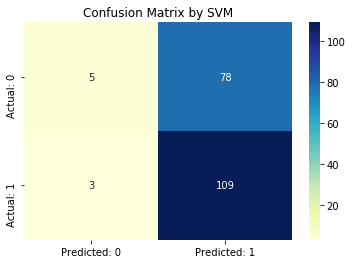

In [99]:
from sklearn.metrics import confusion_matrix

cfmx = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cfmx, columns = ['Predicted: 0', 'Predicted: 1'], index = ['Actual: 0', 'Actual: 1'])

fig = sb.heatmap(data = conf_matrix, annot = True, fmt = 'd', cmap = "YlGnBu")
fig.set_title('Confusion Matrix by SVM')

fig.get_figure().savefig('/home/samiulengineer/Desktop/sami/result_image/conf_matrix_svm.png')

In [100]:
cfmx

array([[  5,  78],
       [  3, 109]])

### **Correct & Incorrect Prediction**

In [101]:
TN = cfmx[0,0]
TP = cfmx[1,1]
FN = cfmx[1,0]
FP = cfmx[0,1]

Total = TN + TP + FN + FP

print("The confusion matrix shows %i correct predictions and %i incorrect predictions" % ((TN + TP), (FN + FP)))

The confusion matrix shows 114 correct predictions and 81 incorrect predictions


In [102]:
1-FP/(FP+TN)

0.06024096385542166

### ***Specificity***

In [103]:
specificity = TN/(TN+FP)
specificity

0.060240963855421686

### Classification Report

In [104]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.06      0.11        83
           1       0.58      0.97      0.73       112

   micro avg       0.58      0.58      0.58       195
   macro avg       0.60      0.52      0.42       195
weighted avg       0.60      0.58      0.47       195



f1-score for 0 and 1 both cases are almost 0.80 which is impressive and a good indication of good model

### **ROC Curve Coverage Area**

In [105]:
roc_auc_score = sklearn.metrics.roc_auc_score(y_test,svm.predict_proba(x_test)[:,1])

if roc_auc_score >= 0.70:
    print("ROC Curve Covers almost %i%% Area" % (round(roc_auc_score, 2)*100))
else:
     print("ROC Curve Covers almost %i%% Area Which is not Satisfactory" % (round(roc_auc_score, 2)*100))  

ROC Curve Covers almost 69% Area Which is not Satisfactory


### **ROC Curve**

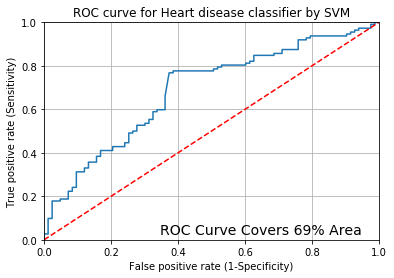

In [106]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(x_test)[:,1])

matplt.plot(fpr,tpr)
matplt.xlim([0.0, 1.0])
matplt.ylim([0.0, 1.0])
matplt.plot([0, 1], [0, 1], 'r--')
matplt.title('ROC curve for Heart disease classifier by SVM')
matplt.xlabel('False positive rate (1-Specificity)')
matplt.ylabel('True positive rate (Sensitivity)')
matplt.grid(True)
matplt.text(0.95, 0.01, "ROC Curve Covers %i%% Area" % (round(roc_auc_score, 2)*100), verticalalignment='bottom', horizontalalignment = 'right', fontsize = 14)

matplt.savefig('/home/samiulengineer/Desktop/sami/result_image/roc_curve_svm.png')

In [107]:
np.average(1-fpr)

0.5659747423428654

Red dot line is the essential factor. ROC curve must be to the upper left corner and make a good distance with red dotted line to make a perfect model.
In this case ROC curve is in almost perfect condition.

### ***MCC***

In [108]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

0.08339625233703832

In [109]:
np.average(1-fpr)

0.5659747423428654